# Decision Trees and Random Forests

### Abdullah MEMISOGLU

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

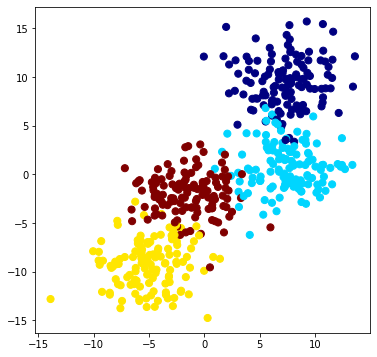

In [3]:
from sklearn.datasets import make_blobs

X,y = make_blobs(n_samples = 500, centers = 4, random_state = 8,
                cluster_std = 2.4)

plt.figure(figsize = (6,6))

plt.scatter(X[:,0], X[:,1], c = y, s = 50, cmap = 'jet')

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
def visualize_tree(classifier, X, y, boundaries = True,xlim = None, ylim = None):
    
    classifier.fit(X,y)
    
    if xlim is None:
        xlim = (X[:, 0].min() - 0.1, X[:,0].max() + 0.1)
        
    if ylim is None:
        ylim = (X[:, 1].min() - 0.1, X[:, 1].max() + 0.1)
    
    #Variable assignment
    x_min, x_max = xlim
    y_min, y_max = ylim
    
    # Mesh Grid
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
    
    # color in the mesh grid
    Z = classifier.predict(np.c_[xx.ravel(),yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize = (10,10))
    plt.pcolormesh(xx, yy, Z, alpha = 0.2, cmap = 'jet', shading = 'auto')
    
    plt.scatter(X[:,0], X[:,1], c = y, s = 50, cmap = 'jet')
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    
    def plot_boundaries(i, xlim, ylim):
        if i < 0:
            return
        
        tree = classifier.tree_
        
        # Recursively go through nodes of tree to plot boundaries
        
        if tree.feature[i] == 0:
            plt.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k')
            plot_boundaries(tree.children_left[i],
                          [xlim[0], tree.threshold[i]], ylim)
            plot_boundaries(tree.children_right[i],
                          [tree.threshold[i], xlim[1]], ylim)
            
            
        elif tree.feature[i] == 1:
            plt.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k')
            plot_boundaries(tree.children_left[i], xlim,
                          [ylim[0], tree.threshold[i]])
            plot_boundaries(tree.children_right[i], xlim,
                          [tree.threshold[i], ylim[1]])
            
    # Random Forest vs Single Tree
    if boundaries:
        plot_boundaries(0, plt.xlim(), plt.ylim())

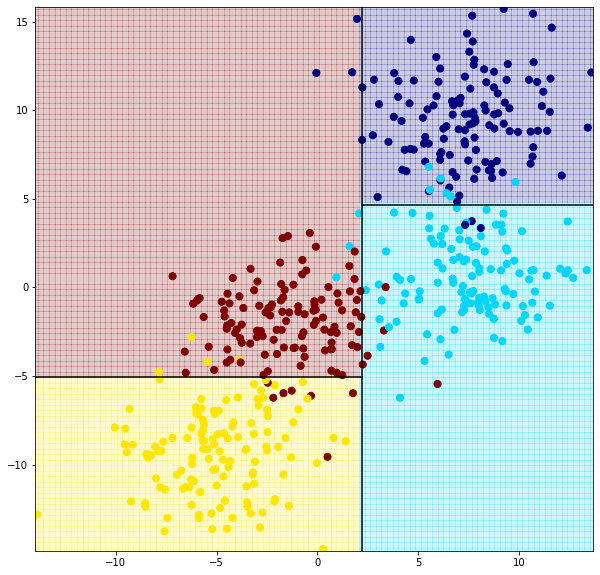

In [17]:
clf = DecisionTreeClassifier(max_depth = 2, random_state = 0)

visualize_tree(clf, X, y)

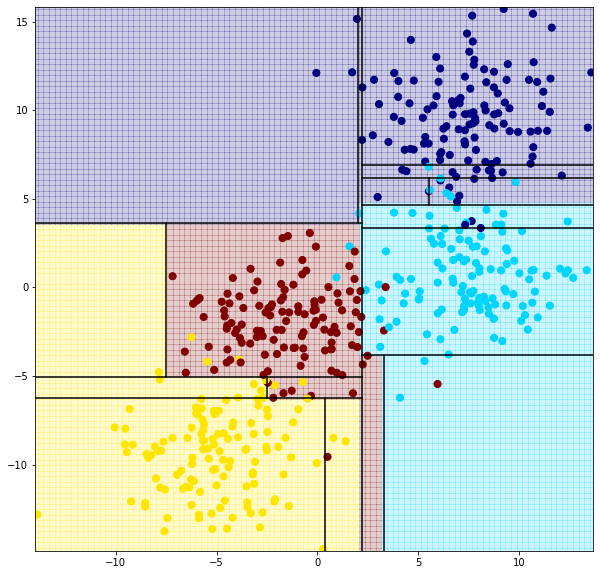

In [18]:
# OVERFITTING with maxdepth = 4
clf = DecisionTreeClassifier(max_depth = 4, random_state = 0)

visualize_tree(clf, X, y)

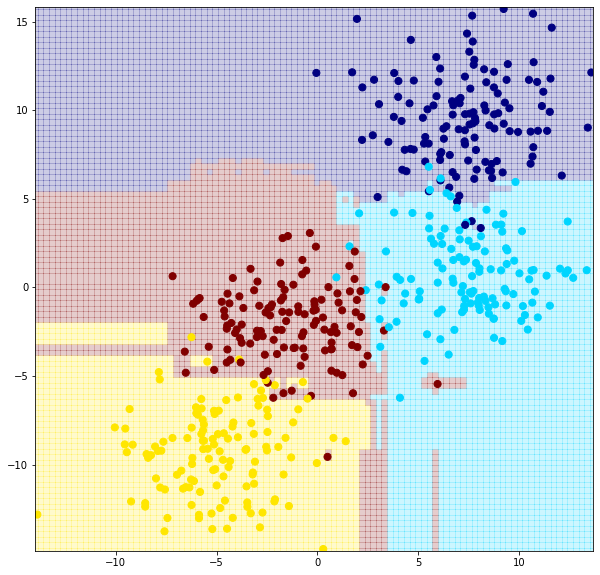

In [19]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100, random_state = 0)

visualize_tree(clf, X, y, boundaries = False)

In [20]:
x = 10 * np.random.rand(100)

In [21]:
x

array([3.61398841, 7.57263129, 7.6669015 , 1.62333123, 2.62611638,
       6.56830984, 7.81903161, 4.33325145, 1.87032306, 5.07407439,
       3.56249002, 0.62646173, 9.47565995, 9.15654904, 7.12592417,
       7.26937027, 3.5667364 , 1.40456578, 9.26764593, 1.65360856,
       1.22792327, 1.57625184, 3.59902949, 0.69107328, 8.14557035,
       4.87002549, 1.43354042, 1.41658796, 0.23178965, 2.11073132,
       1.80633749, 5.23371576, 0.68442573, 6.06306804, 5.87225185,
       5.39062311, 0.88528322, 9.91684508, 2.26336255, 5.23053088,
       1.79229682, 8.26924957, 8.22188304, 6.92792502, 6.42858519,
       0.49460059, 0.18768583, 2.17213147, 6.42695915, 0.78216181,
       2.91172111, 8.61131327, 8.08739577, 2.38679544, 2.97175148,
       3.8658201 , 6.98555762, 8.33503153, 9.74517851, 8.65454948,
       6.96072686, 5.34856908, 2.49509396, 9.38525752, 9.83353836,
       2.63011695, 6.80247988, 0.61957146, 8.40414796, 9.22194324,
       9.50585149, 7.16346763, 8.25420035, 7.38071421, 8.51371

In [22]:
def sin_model(x, sigma = 0.2):
    
    noise = sigma * np.random.rand(len(x))
    
    return np.sin(5*x) + np.sin(0.5 * x) + noise

<ErrorbarContainer object of 3 artists>

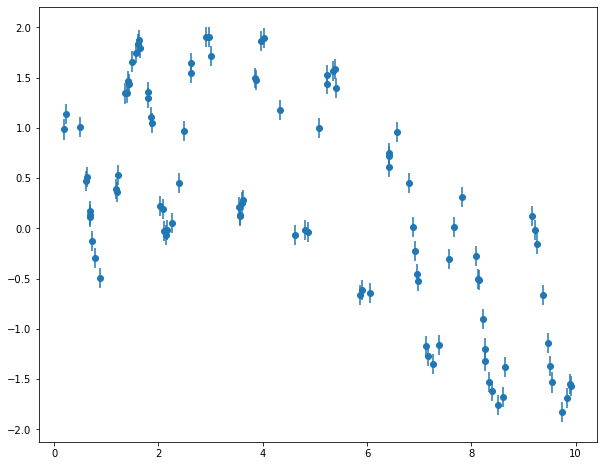

In [25]:
y = sin_model(x)

plt.figure(figsize = (10,8))
plt.errorbar(x,y,0.1,fmt = 'o')

In [26]:
from sklearn.ensemble import RandomForestRegressor

xfit = np.linspace(0, 10, 1000)

rfr = RandomForestRegressor(100)

rfr.fit(x[:,None], y)

yfit = rfr.predict(xfit[:,None])

In [28]:
ytrue = sin_model(xfit, 0)

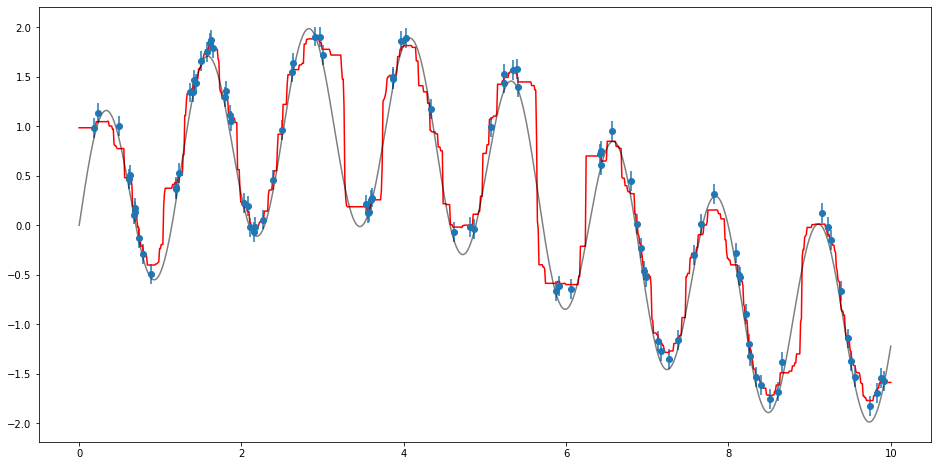

In [30]:
plt.figure(figsize = (16, 8))
plt.errorbar(x,y,0.1, fmt = 'o')

plt.plot(xfit, yfit, '-r')

plt.plot(xfit, ytrue, '-k', alpha = 0.5)